### <center>📜 **<font color="yellow">Question 1:</font> Why is the distribution between counties uneven?** </center>

#### 📙**Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

### ✨ **1. Get data preprocessing**

In [2]:
df = pd.read_csv('../data/HCMHouseRentPreprocessing.csv')
df['published'] = pd.to_datetime(df['published'], format='%Y-%m-%d')
df.head()

,id,title,price,published,acreage,street,ward,district
0,0,"Cho thuê nhà trọ mới sạch đẹp tại Lê Đình Cẩn,...",2200000,2022-05-16,20.0,Lê Đình Cẩn,Phường Tân Tạo,Quận Bình Tân
1,1,Cho thuê phòng trọ giá rẻ ở mặt tiền hẻm lớn Đ...,2500000,2022-04-20,20.0,487/35/25 Đường Huỳnh Tấn Phát,Phường Tân Thuận Đông,Quận 7
2,2,Cho thuê phòng trọ kdc Nam Long-Trần Trọng Cun...,3500000,2022-05-10,30.0,Đường 10,Phường Tân Thuận Đông,Quận 7
3,3,Phòng trọ giá rẻ ngay cổng khu chế xuất Tân Th...,1500000,2022-05-05,30.0,283/15 Huỳnh Tấn Phát,Phường Tân Thuận Đông,Quận 7
4,4,"Cho thuê phòng có gác, không gác, tolet riêng ...",3500000,2022-01-05,18.0,Lê Văn Sỹ,Phường 14,Quận Phú Nhuận


### 🖊 **2. Count number district in HCM city in year that have number published most of rooms**

In [3]:
df['district'].value_counts()

Quận Bình Thạnh     735
Quận Gò Vấp         609
Quận Phú Nhuận      589
Quận Tân Bình       563
Quận 3              535
Quận 10             510
Quận 5              485
Quận 4              461
Quận 11             419
Quận 8              415
Quận 12             401
Quận Tân Phú        395
Quận 9              383
Quận 1              375
Quận Bình Tân       370
Quận Thủ Đức        363
Quận 7              362
Quận 6              287
Quận 2              269
Huyện Nhà Bè        122
Huyện Bình Chánh    116
Huyện Hóc Môn        94
Huyện Củ Chi         19
Name: district, dtype: int64

### 📍 **3. Visualize number of houses for rent in each district of Ho Chi Minh City**

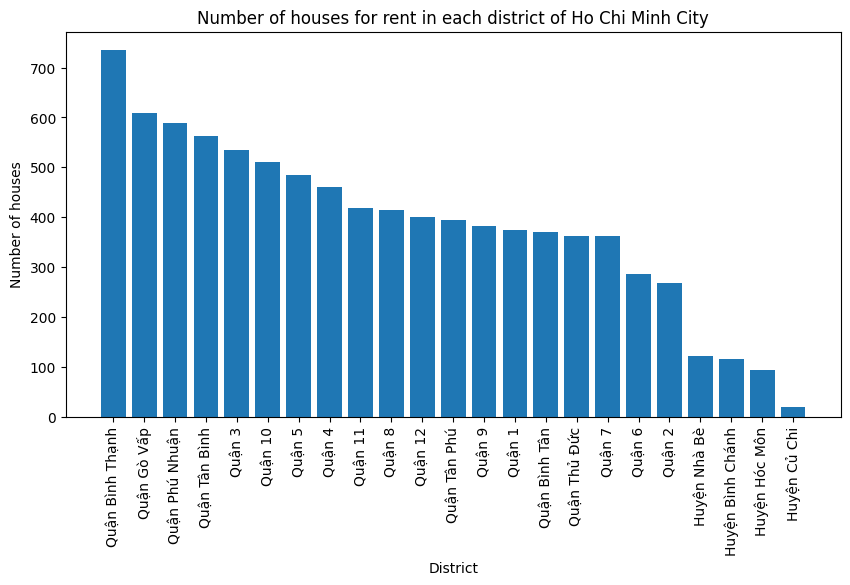

In [4]:
# visualize result with bar chart
plt.figure(figsize=(10, 5))
plt.bar(df['district'].value_counts().index, df['district'].value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Number of houses')
plt.title('Number of houses for rent in each district of Ho Chi Minh City')
plt.show()

### 📍 **4. Continue get year published most of rooms to compare with number of houses for rent in each district of Ho Chi Minh City**

In [5]:
# get year have most house rent
top1_year = df['published'].dt.year.value_counts()

#### We can see in 2022 have number of rooms published most

In [6]:
# get district have most house rent in 2022
top1_year = top1_year.index[0]
df[df['published'].dt.year == top1_year]['district'].value_counts()

Quận Gò Vấp         492
Quận Bình Thạnh     378
Quận Tân Phú        354
Quận Tân Bình       326
Quận 7              323
Quận Bình Tân       285
Quận 10             208
Quận 12             200
Quận 9              190
Quận 3              173
Quận Phú Nhuận      164
Quận Thủ Đức        164
Quận 1              151
Quận 2              122
Quận 8              114
Quận 11              84
Quận 5               83
Quận 6               77
Quận 4               66
Huyện Nhà Bè         50
Huyện Hóc Môn        32
Huyện Bình Chánh     24
Huyện Củ Chi          3
Name: district, dtype: int64

#### Visualize compare number of houses for rent in each district of Ho Chi Minh City in 2022 and all year 

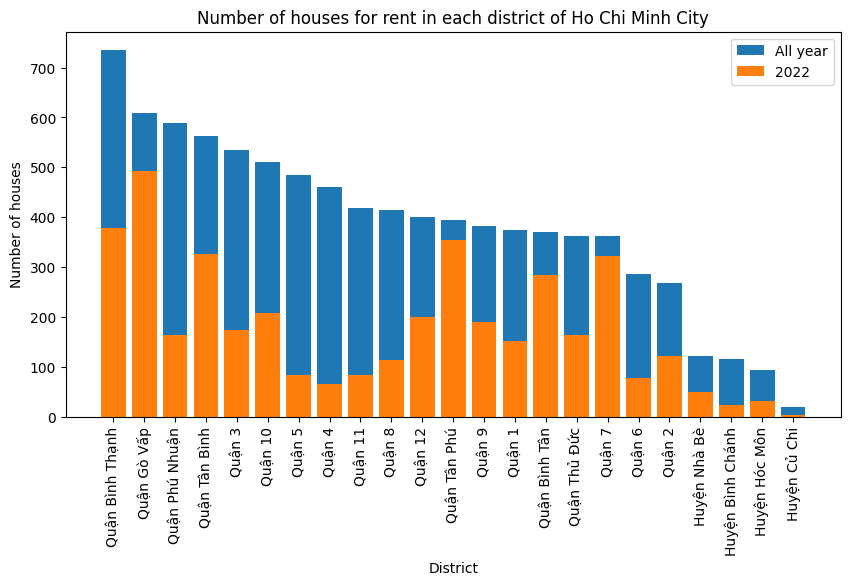

In [7]:
# Visualize compare number of houses for rent in each district of Ho Chi Minh City in 2022 and all year 
plt.figure(figsize=(10, 5))
plt.bar(df['district'].value_counts().index, df['district'].value_counts().values, label='All year')
plt.bar(df[df['published'].dt.year == top1_year]['district'].value_counts().index, df[df['published'].dt.year == top1_year]['district'].value_counts().values, label='2022')
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Number of houses')   
plt.title('Number of houses for rent in each district of Ho Chi Minh City')
plt.legend()
plt.show()


##### &#9889; <font color="yellow"><b>Comment</b></font>
>- We can see in 2022 have number of rooms published most but in the downtown districts tended to decrease significantly, while in the districts adjacent to the city center, the listings were higher, showing us that the demand for housing in the city near the center is higher than the demand for housing in the city center. 
>- In 2022 district `Quận Gò Vấp` and `Quận Tân Phú` and `Quận Bình Tân` and `Quận 7` have high rate rate compared to all previous listing time and the remaining districts show no sign of increasing over the previous years (Because the house prices here are quite high and the demand for accommodation is not much or in the districts too far from the city with poor facilities, ... )

### 📍**5. Get top 3 district have highest number and lowest number of houses for rent in HCM city**

In [8]:
top_3_district_highest = df['district'].value_counts().head(3).index
top_3_district_lowest = df['district'].value_counts().tail(3).index

##### Visualize top 5 district have highest number and lowest number of houses for rent in HCM city to compare about price

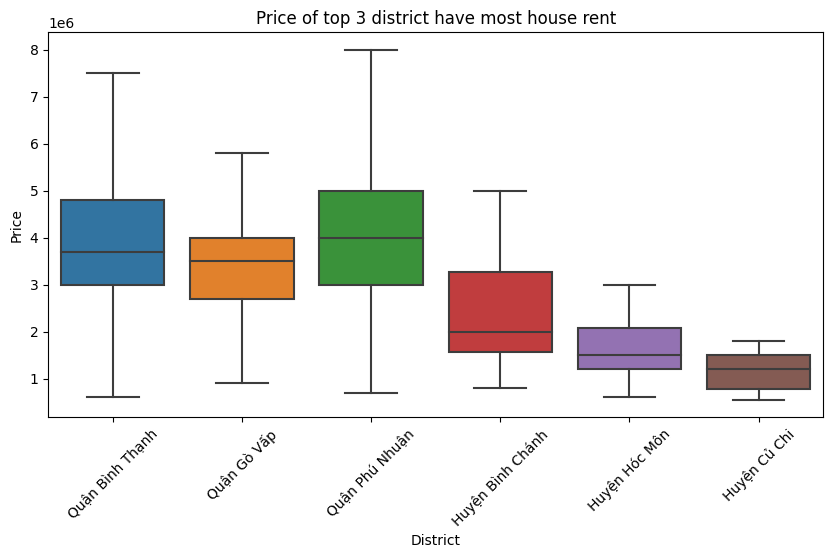

In [9]:
# Visualize compare price of top_3_district_highest and top_3_district_lowest using boxplot 
plt.figure(figsize=(10, 5))
sns.boxplot(x='district', y='price', data=df[df['district'].isin([*top_3_district_highest, *top_3_district_lowest])], order=[*top_3_district_highest, *top_3_district_lowest], showfliers=False)
plt.xticks(rotation=45)
plt.xlabel('District')
plt.ylabel('Price')
plt.title('Price of top 3 district have most house rent')
plt.show()

##### Visualize compare acreage of houses for rent in top_5 district have highest number and lowest number of houses for rent in HCM city

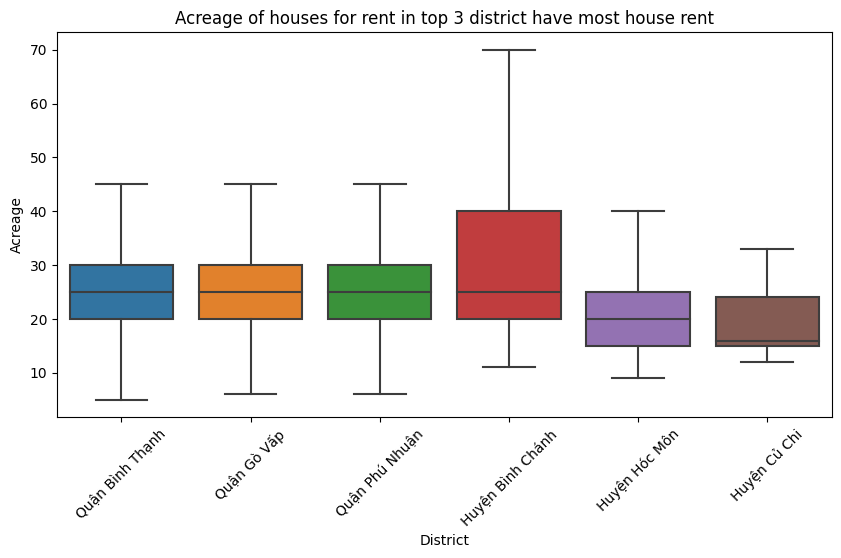

In [10]:
# Visualize compare acreage of houses for rent in top_5 district have highest number and lowest number of houses for rent in HCM city
plt.figure(figsize=(10, 5))
sns.boxplot(x='district', y='acreage', data=df[df['district'].isin([*top_3_district_highest, *top_3_district_lowest])], order=[*top_3_district_highest, *top_3_district_lowest], showfliers=False)
plt.xticks(rotation=45)
plt.xlabel('District')  
plt.ylabel('Acreage')
plt.title('Acreage of houses for rent in top 3 district have most house rent')
plt.show()

&#9889; <font color="yellow"><b>What are benefits of finding the answer? </b></font>
>- Then after we can choose district to live in HCMC
>- We can know the number of rooms in each district and the proportion of rooms in each district, from which we can see which district has the most rooms, and why it has so many rooms (school, industrial area)
>- We can see "Quận Bình Thạnh" is most popular district in HCMC, and "Quận 1" is the least popular district in HCMC (because of the high price of rooms in "Quận 1"). And because `Quận Bình Thạnh` is near university school and price of rooms is not high and food is cheap, so it is the most popular district in HCMC.
>- And the district `Huyện Nhà Bè`, `Huyện Hóc Môn`, `Huyện Củ Chi`, `Huyện Bình Chánh` is the least popular district in HCMC (because of the far from center of HCMC and price of rooms is not high and food is cheap but job opportunities, the workers are not many and security is not good,... so it is the least popular district in HCMC).